<h1 style='text-align:center;color:red;'>In the name of God</h1>

# 🐶 End-to-end Multil-class Dog Breed Classification

This notebook builds an end-to-end multi-class image classifier using TensorFlow 2.x and TensorFlow Hub.

## 1. Problem

Identifying the breed of a dog given an image of a dog.

When I'm sitting at the cafe and I take a photo of a dog, I want to know what breed of dog it is.

## 2. Data

The data we're using is from Kaggle's dog breed identification competition.

https://www.kaggle.com/c/dog-breed-identification/data

## 3. Evaluation

The evaluation is a file with prediction probabilities for each dog breed of each test image.

https://www.kaggle.com/c/dog-breed-identification/overview/evaluation

## 4. Features

Some information about the data:
* We're dealing with images (unstructured data) so it's probably best we use deep learning/transfer learning.
* There are 120 breeds of dogs (this means there are 120 different classes).
* There are around 10,000+ images in the training set (these images have labels).
* There are around 10,000+ images in the test set (these images have no labels, because we'll want to predict them).


In [ ]:
# the correct way to upload file in colab is to right click on the folder and click upload option
# of course before that we have to mount colab to google drive

In [ ]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [ ]:
# 223

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# lets extract our data
# !unzip "drive/My Drive/data-project3/archive_3.zip" -d "drive/My Drive/data-project3/"

In [ ]:
# Run this cell if TensorFlow 2.x isn't the default in Colab
try:
  # %tensorflow_version only exists in Colab
  %tensorflow_version 2.x
except Exception:
  pass

In [ ]:
# load data:
df = pd.read_csv('drive/MyDrive/data-project3/sample_submission.csv')
df

In [ ]:
df.head(10).T

In [ ]:
# import Tensorflow and check it's version
import tensorflow as tf
print(tf.__version__)

In [ ]:
# 225

In [ ]:
# import tensorflow hub and check its version
import tensorflow_hub as th
print(f'tensorflow hub version: {th.__version__}')

# check having gpu by command:
print('Access to GPU is ok!' if tf.config.list_physical_devices("GPU") else 'Access is\'nt available')

# access colab gpu by change runtime type from runtime menu


In [ ]:
# 226

In [ ]:
#load labels
labels = pd.read_csv('drive/MyDrive/data-project3/labels.csv')
labels

# Getting our data ready:

In [ ]:
# describe labels and get head
print(labels.head(), labels.describe(), sep='\n')

In [ ]:
# 227: to 9 min

In [ ]:
# how many images are there of each breed
labels['breed'].value_counts()

In [ ]:
# let's visualize it
labels['breed'].value_counts().plot.bar(figsize=(20, 10));

In [ ]:
# we searched about minimom number of photos of each breed and found out that we need at least 10 photos per breed
labels['breed'].value_counts().median()

In [ ]:
labels['breed'].value_counts().mean()

In [ ]:
labels.head(5)

In [ ]:
# Lets view an image
from IPython.display import Image
Image('drive/MyDrive/data-project3/train/000bec180eb18c7604dcecc8fe0dba07.jpg')

### Getting images and their labels

Let's get a list of all of our image file pathnames.

In [ ]:
labels.head()

In [ ]:
# Create pathnames from image ID's
filenames = ["drive/MyDrive/data-project3/train/" + fname + ".jpg" for fname in labels["id"]]

# Check the first 10
filenames[:10]

In [ ]:
Image(filenames[10])

In [ ]:
labels['breed'][10]

In [ ]:
# Check whether number of filenames matches number of actual image files
import os
if len(os.listdir('drive/MyDrive/data-project3/train/')) == len(filenames):
  print("Filenames match actual amount of files!!! Proceed.")
else:
  print("Filenames do no match actual amount of files, check the target directory.")

In [ ]:
# One more check
print(f'This dog is a/an {labels["breed"][20]} dog')
Image(filenames[20])

In [ ]:
# 228 : to 2 min

In [ ]:
labels_csv = pd.read_csv('drive/MyDrive/data-project3/labels.csv')
labels = labels_csv['breed'].to_numpy()
labels

In [ ]:
unique_breeds = np.unique(labels)
print(f'We have {len(unique_breeds)} unique breeds\n\n list of them: {unique_breeds}')

In [ ]:
# Turn a single label into an array of booleans
print(labels[0])
labels[0] == unique_breeds

In [ ]:
len(labels)

10222

In [ ]:
# Turn every label into a boolean array
boolean_labels = [label == unique_breeds for label in labels]
boolean_labels[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [ ]:
# Example: Turning boolean array into integers
print(labels[2]) # original label
print(boolean_labels[2].argmax()) # index where label occurs
print(np.where(labels[2] == unique_breeds))  # index where label occurs in boolean array
print(boolean_labels[2].astype(int)) # there will be a 1 where the sample label occurs


print(labels[0])
print(boolean_labels[0].argmax())
print(np.where(labels[0] == unique_breeds))
print(boolean_labels[0].astype(int))

pekinese
85
(array([85]),)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]
boston_bull
19
(array([19]),)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [ ]:
filenames[:10]

['drive/MyDrive/data-project3/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'drive/MyDrive/data-project3/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'drive/MyDrive/data-project3/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'drive/MyDrive/data-project3/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'drive/MyDrive/data-project3/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'drive/MyDrive/data-project3/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'drive/MyDrive/data-project3/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'drive/MyDrive/data-project3/train/002a283a315af96eaea0e28e7163b21b.jpg',
 'drive/MyDrive/data-project3/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'drive/MyDrive/data-project3/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

### Creating our own validation set
Since the dataset from Kaggle doesn't come with a validation set, we're going to create our own.

In [ ]:
# Setup X & y variables
X = filenames
y = boolean_labels

In [ ]:
len(filenames)

10222

We're going to start off experimenting with ~1000 images and increase as needed.

In [ ]:
# Set number of images to use for experimenting
ImageNumber = 1000 #@param {type:"slider", min:1000, max:10000, step:1000}

In [ ]:
# Let's split our data into train and validation sets
from sklearn.model_selection import train_test_split
# Split them into training and validation of total size NUM_IMAGES
x_train, x_val, y_train, y_val = train_test_split(X[:ImageNumber], y[:ImageNumber], test_size=0.2, random_state=42)

len(x_train), len(y_train), len(x_val), len(y_val)

(800, 800, 200, 200)

In [ ]:
# Let's have a geez at the training data
x_train[:5], y_train[:2]

(['drive/MyDrive/data-project3/train/00bee065dcec471f26394855c5c2f3de.jpg',
  'drive/MyDrive/data-project3/train/0d2f9e12a2611d911d91a339074c8154.jpg',
  'drive/MyDrive/data-project3/train/1108e48ce3e2d7d7fb527ae6e40ab486.jpg',
  'drive/MyDrive/data-project3/train/0dc3196b4213a2733d7f4bdcd41699d3.jpg',
  'drive/MyDrive/data-project3/train/146fbfac6b5b1f0de83a5d0c1b473377.jpg'],
 [array([False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False,  True,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False,

## Preprocessing Images (turning images into Tensors)

To preprocess our images into Tensors we're going to write a function which does a few things:
1. Take an image filepath as input
2. Use TensorFlow to read the file and save it to a variable, `image`
3. Turn our `image` (a jpg) into Tensors
4. Normalize our image (convert color channel values from from 0-255 to 0-1).
5. Resize the `image` to be a shape of (224, 224)
6. Return the modified `image`

Before we do, let's see what importing an image looks like.

In [ ]:
# Convert image to NumPy array
from matplotlib.pyplot import imread
image = imread(filenames[24])
image.shape

(280, 200, 3)

array([[[  0,   4,   0],
        [  0,   9,   3],
        [  2,  11,   6],
        ...,
        [  0,  13,   4],
        [ 12,  25,  16],
        [  0,   5,   0]],

       [[  0,   9,   3],
        [  7,  18,  12],
        [ 14,  23,  18],
        ...,
        [ 23,  36,  27],
        [ 34,  47,  38],
        [ 10,  23,  14]],

       [[  0,  10,   4],
        [  9,  20,  14],
        [ 17,  26,  21],
        ...,
        [ 17,  33,  23],
        [ 27,  43,  33],
        [  1,  17,   7]],

       ...,

       [[  0,   1,   0],
        [  5,   7,   2],
        [  9,  11,   6],
        ...,
        [ 71,  84,  77],
        [ 89, 104,  99],
        [ 30,  45,  38]],

       [[  6,   8,   3],
        [ 11,  13,   8],
        [ 13,  15,  10],
        ...,
        [121, 130, 127],
        [107, 117, 116],
        [ 15,  27,  23]],

       [[  1,   3,   0],
        [  6,   8,   3],
        [  6,   8,   3],
        ...,
        [ 19,  28,  27],
        [ 41,  50,  49],
        [  0,   5,   4]]], dtype=uint8)
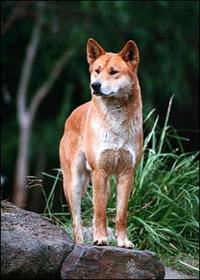

In [ ]:
image

In [ ]:
image[:2]

array([[[ 0,  4,  0],
        [ 0,  9,  3],
        [ 2, 11,  6],
        ...,
        [ 0, 13,  4],
        [12, 25, 16],
        [ 0,  5,  0]],

       [[ 0,  9,  3],
        [ 7, 18, 12],
        [14, 23, 18],
        ...,
        [23, 36, 27],
        [34, 47, 38],
        [10, 23, 14]]], dtype=uint8)

In [ ]:
image.max(), image.min()

(np.uint8(255), np.uint8(0))

In [ ]:
# turn image into a tensor
tf.constant(image)[:2]

<tf.Tensor: shape=(2, 200, 3), dtype=uint8, numpy=
array([[[ 0,  4,  0],
        [ 0,  9,  3],
        [ 2, 11,  6],
        ...,
        [ 0, 13,  4],
        [12, 25, 16],
        [ 0,  5,  0]],

       [[ 0,  9,  3],
        [ 7, 18, 12],
        [14, 23, 18],
        ...,
        [23, 36, 27],
        [34, 47, 38],
        [10, 23, 14]]], dtype=uint8)>

Now we've seen what an image looks like as a Tensor, let's make a function to preprocess them.

We'll create a function to:

1. Take an image filepath as input
2. Use TensorFlow to read the file and save it to a variable, `image`
3. Turn our `image` (a jpg) into Tensors
4. Normalize our image (convert color channel values from from 0-255 to 0-1).
5. Resize the `image` to be a shape of (224, 224)
6. Return the modified `image`

More information on loading images in TensorFlow can be seen here: https://www.tensorflow.org/tutorials/load_data/images

In [ ]:
# Define image size
IMG_SIZE = 224

# Create a function for preprocessing images
def process_image(image_path, img_size=IMG_SIZE):
  """
  Takes an image file path and turns the image into a Tensor.
  """
  # Read in an image file
  image = tf.io.read_file(image_path)
  # Turn the jpeg image into numerical Tensor with 3 colour channels (Red, Green, Blue)
  image = tf.image.decode_jpeg(image, channels=3)
  # Convert the colour channel values from 0-255 to 0-1 values
  image = tf.image.convert_image_dtype(image, tf.float32)
  # Resize the image to our desired value (224, 224)
  image = tf.image.resize(image, size=[IMG_SIZE, IMG_SIZE])

  return image

## Turning our data into batches

Why turn our data into batches?

Let's say you're trying to process 10,000+ images in one go... they all might not fit into memory.

So that's why we do about 32 (this is the batch size) images at a time (you can manually adjust the batch size if need be).

In order to use TensorFlow effectively, we need our data in the form of Tensor tuples which look like this:
`(image, label)`.

In [ ]:
# Create a simple function to return a tuple (image, label)
def get_image_label(image_path, label):
  """
  Takes an image file path name and the assosciated label,
  processes the image and reutrns a typle of (image, label).
  """
  image = process_image(image_path)
  return image, label

In [ ]:
# Demo of the above
(process_image(X[42]), tf.constant(y[42]))

(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[0.3264178 , 0.5222886 , 0.3232816 ],
         [0.2537167 , 0.44366494, 0.24117759],
         [0.25699762, 0.4467087 , 0.23893751],
         ...,
         [0.29325107, 0.5189916 , 0.3215547 ],
         [0.29721776, 0.52466875, 0.33030328],
         [0.2948505 , 0.5223015 , 0.33406618]],
 
        [[0.25903144, 0.4537807 , 0.27294815],
         [0.24375686, 0.4407019 , 0.2554778 ],
         [0.2838985 , 0.47213382, 0.28298813],
         ...,
         [0.2785345 , 0.5027992 , 0.31004712],
         [0.28428748, 0.5108719 , 0.32523635],
         [0.28821915, 0.5148036 , 0.32916805]],
 
        [[0.20941195, 0.40692952, 0.25792548],
         [0.24045378, 0.43900946, 0.2868911 ],
         [0.29001117, 0.47937486, 0.32247734],
         ...,
         [0.26074055, 0.48414773, 0.30125174],
         [0.27101526, 0.49454468, 0.32096273],
         [0.27939945, 0.5029289 , 0.32934693]],
 
        ...,
 
        [[0.00634795, 0.03442048

Now we've got a way to turn our data into tuples of Tensors in the form: `(image, label)`, let's make a function to turn all of our data (`X` & `y`) into batches!

In [ ]:
print(tf.constant(X[:2]), tf.constant(y[:2]), sep='\n', end='\n')
print(tf.constant(x_train[:2]), tf.constant(y_train[:2]), sep='\n', end='\n')

tf.Tensor(
[b'drive/MyDrive/data-project3/train/000bec180eb18c7604dcecc8fe0dba07.jpg'
 b'drive/MyDrive/data-project3/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg'], shape=(2,), dtype=string)
tf.Tensor(
[[False False False False False False False False False False False False
  False False False False False False False  True False False False False
  False False False False False False False False False False False False
  False False False False False False False False False False False False
  False False False False False False False False False False False False
  False False False False False False False False False False False False
  False False False False False False False False False False False False
  False False False False False False False False False False False False
  False False False False False False False False False False False False
  False False False False False False False False False False False False]
 [False False False False False False False False False Fal

In [ ]:
# Define the batch size, 32 is a good start
BATCH_SIZE = 32

# Create a function to turn data into batches
def create_data_bathes(X, y=None, batch_size=BATCH_SIZE, validation_data=False, test_data=False):
  """
  Creates batches of data out of image (X) and label (y) pairs.
  Shuffles the data if it's training data but doesn't shuffle if it's validation data.
  Also accepts test data as input (no labels).
  """
  # If the data is a test dataset, we probably don't have have labels
  if test_data:
    print('creating test data batches')
    data = tf.data.Dataset.from_tensor_slices(tf.constant(X)) # only filepaths (no labels)
    data_batch = data.map(process_image).batch(batch_size)
    return data_batch

  # If the data is a valid dataset, we don't need to shuffle it
  elif validation_data:
    print('creating validation data batches')
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X), # filepaths
                                              tf.constant(y))) # labels
    data_batch = data.map(get_image_label).batch(batch_size)
    return data_batch



  else:
    print('creating training data batches')
    # Turn filepaths and labels into Tensors
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X),
                                              tf.constant(y)))
    # Shuffling pathnames and labels before mapping image processor function is faster than shuffling images
    data_shuffled = data.shuffle(len(X))
    # Create (image, label) tuples (this also turns the iamge path into a preprocessed image)
    data_map = data_shuffled.map(get_image_label)
    # Turn the training data into batches
    data_batch = data_map.batch(batch_size)
    return data_batch


In [ ]:
# Create training and validation data batches
train_data = create_data_bathes(x_train, y_train)
val_data = create_data_bathes(x_val, y_val, validation_data=True)

creating training data batches
creating validation data batches


In [ ]:
# Check out the different attributes of our data batches
train_data.element_spec, val_data.element_spec

## Visualizing Data Batches

Our data is now in batches, however, these can be a little hard to understand/comprehend, let's visualize them!

In [ ]:
import matplotlib.pyplot as plt

# Create a function for viewing images in a data batch
def show_25_images(images, labels):
  """
  Displays a plot of 25 images and their labels from a data batch.
  """
  # Setup the figure
  plt.figure(figsize=(10, 10))
  # Loop through 25 (for displaying 25 images)
  for i in range(25):
    # Create subplots (5 rows, 5 columns)
    plt.subplot(5, 5, i+1)
    # Display an image
    plt.imshow(images[i])
    # Add the image label as the title
    plt.title(unique_breeds[labels[i].argmax()])
    # Turn the grid lines off
    plt.axis('off')

In [ ]:
train_data

In [ ]:
# because our data is batch, we have to unbatch it to plot and then we are gonna make our data iterating by next
# Now let's visualize the data in a training batch
train_images, train_labels = next(train_data.as_numpy_iterator())
show_25_images(train_images, train_labels)

## Building a model

Before we build a model, there are a few things we need to define:
* The input shape (our images shape, in the form of Tensors) to our model.
* The output shape (image labels, in the form of Tensors) of our model.
* The URL of the model we want to use from TensorFlow Hub - https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4

In [ ]:
IMG_SIZE

In [ ]:
# Setup input shape to the model
INPUT_SHAPE = [None, IMG_SIZE, IMG_SIZE, 3] # batch, height, width, colour channels

# Setup output shape of our model
OUTPUT_SHAPE = len(unique_breeds)
# Setup model URL from TensorFlow Hub
MODEL_URL = "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4"

In [ ]:
INPUT_SHAPE

In [ ]:
# because our data is batch, we have to unbatch it to plot and then we are gonna make our data iterating by next


In [ ]:
#cdcs

In [ ]:
# Explore Tensorflow hub

In [ ]:
# 240

In [ ]:
# Use another model url for our model to improve it